In [10]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
data = pd.read_csv("diabetes.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               763 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             763 non-null    float64
 3   SkinThickness             765 non-null    float64
 4   Insulin                   764 non-null    float64
 5   BMI                       763 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       762 non-null    float64
 8   Outcome                   767 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [16]:
data.dropna(subset=['Age'], axis=0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               760 non-null    float64
 1   Glucose                   762 non-null    int64  
 2   BloodPressure             757 non-null    float64
 3   SkinThickness             759 non-null    float64
 4   Insulin                   758 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  762 non-null    float64
 7   Age                       762 non-null    float64
 8   Outcome                   761 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 59.5 KB


In [34]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

<AxesSubplot: xlabel='Pregnancies'>

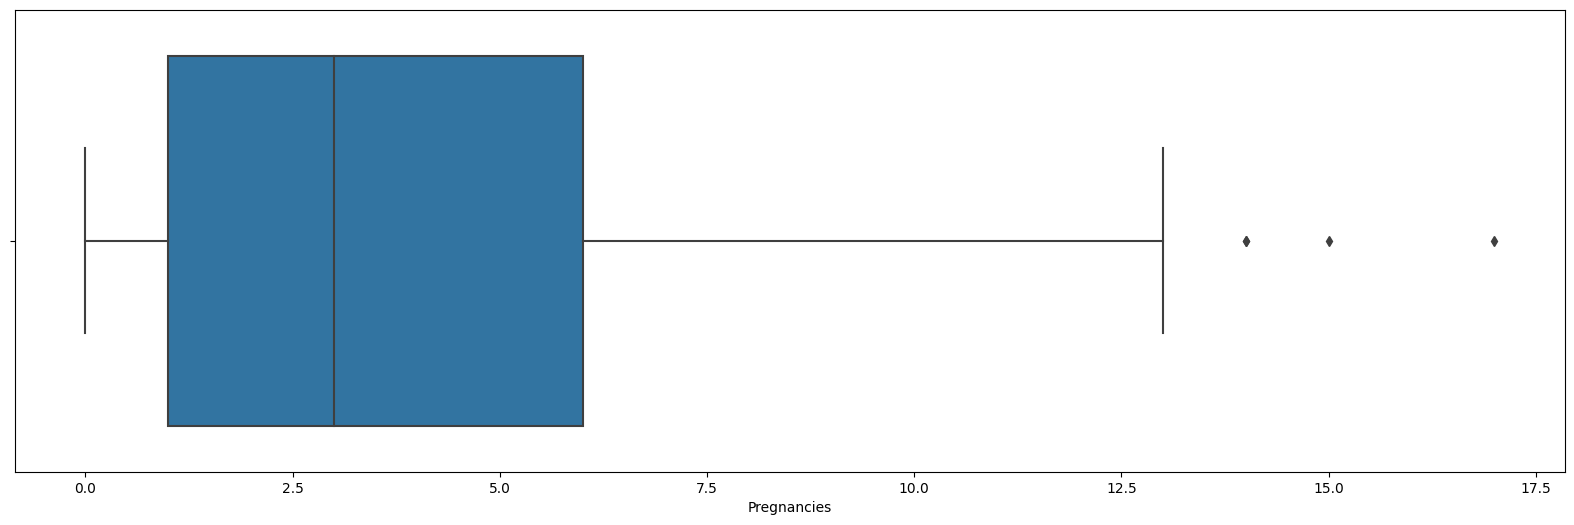

In [35]:
plt.figure(figsize=(20, 6))
sns.boxplot(x=data['Pregnancies'])

In [36]:
data['Pregnancies'].fillna(data['Pregnancies'].median(), inplace=True)

<AxesSubplot: xlabel='Glucose'>

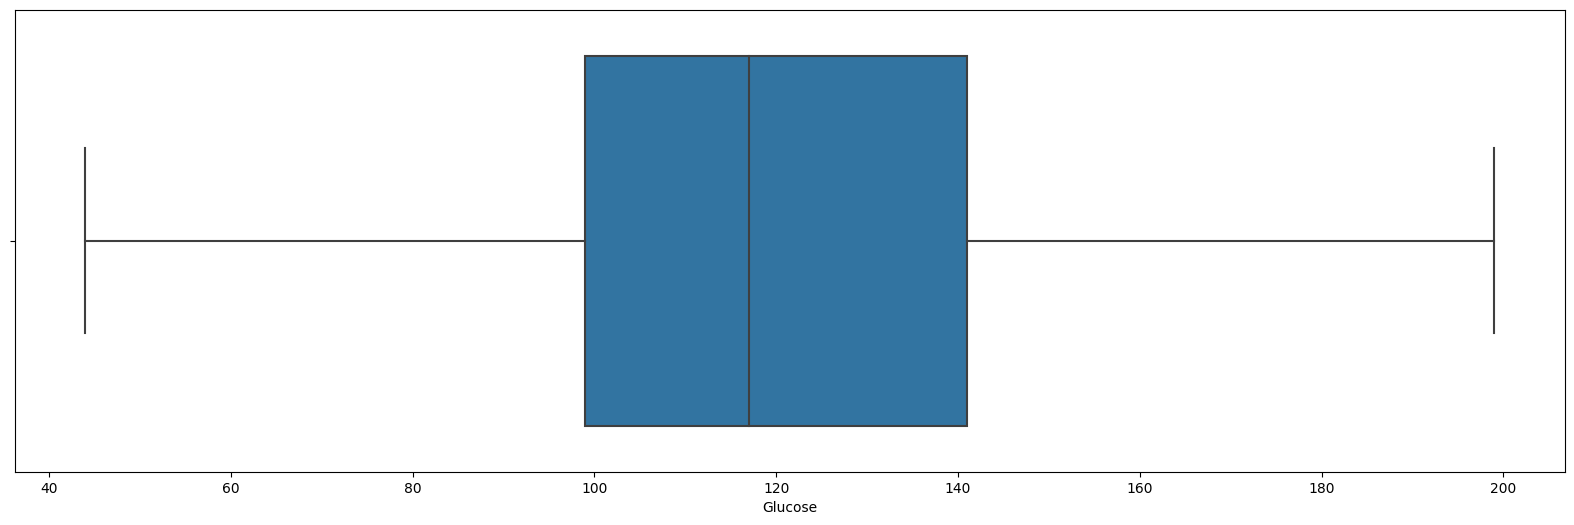

In [37]:
plt.figure(figsize=(20, 6))
sns.boxplot(x=data['Glucose'])

In [68]:
data['Glucose'].fillna(data['Glucose'].mean(), inplace=True)

<AxesSubplot: xlabel='BloodPressure'>

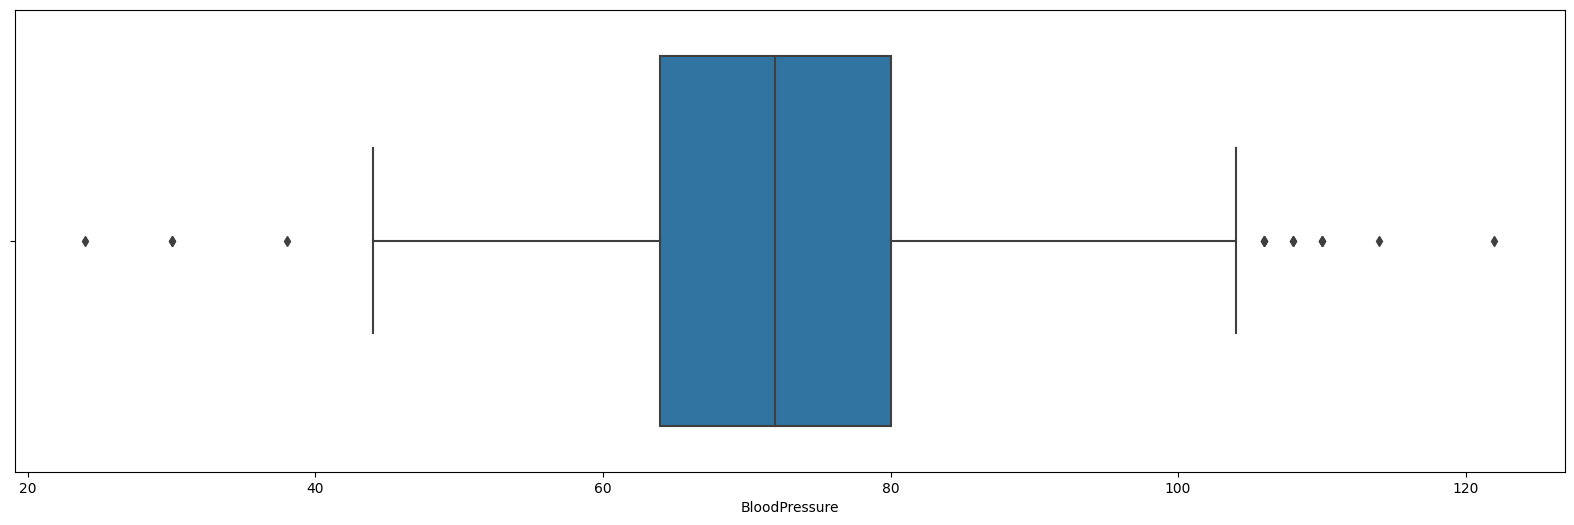

In [39]:
plt.figure(figsize=(20, 6))
sns.boxplot(x=data['BloodPressure'])

In [40]:
data['BloodPressure'].fillna(data['BloodPressure'].median(), inplace=True)

<AxesSubplot: xlabel='SkinThickness'>

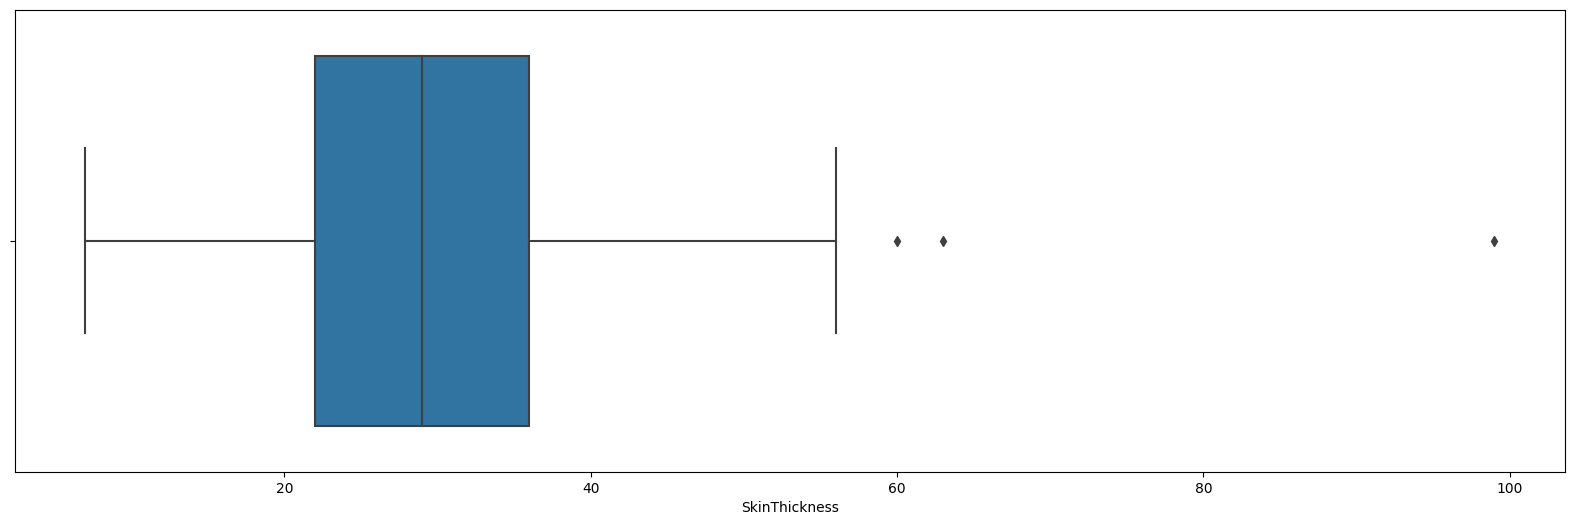

In [41]:
plt.figure(figsize=(20, 6))
sns.boxplot(x=data['SkinThickness'])

In [42]:
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace=True)

<AxesSubplot: xlabel='Insulin'>

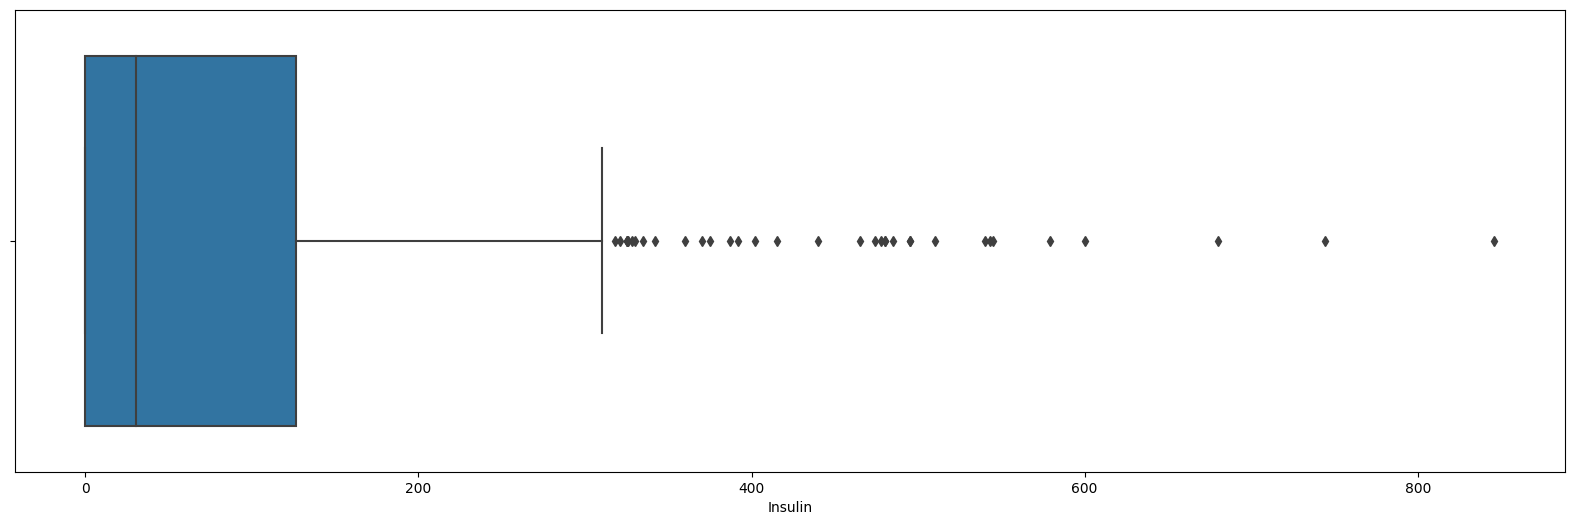

In [30]:
plt.figure(figsize=(20, 6))
sns.boxplot(x=data['Insulin'])

In [43]:
data['Insulin'].fillna(data['Insulin'].median(), inplace=True)

<AxesSubplot: xlabel='BMI'>

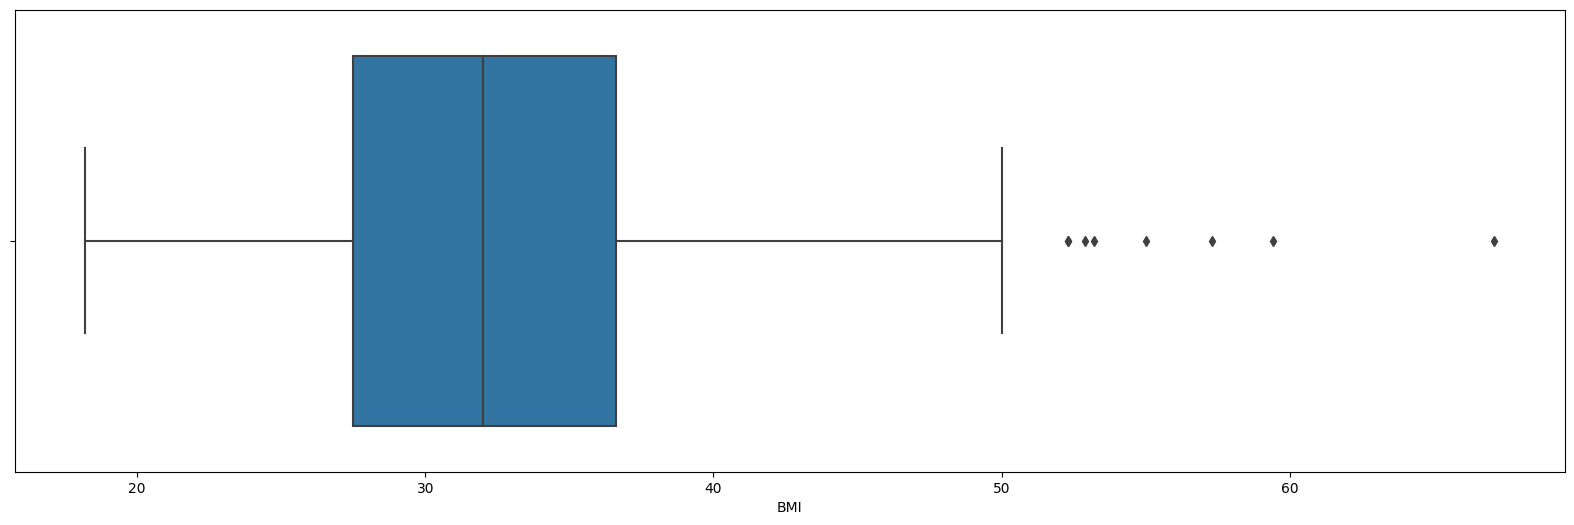

In [44]:
plt.figure(figsize=(20, 6))
sns.boxplot(x=data['BMI'])

In [45]:
data['BMI'].fillna(data['BMI'].median(), inplace=True)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               762 non-null    float64
 1   Glucose                   762 non-null    float64
 2   BloodPressure             762 non-null    float64
 3   SkinThickness             762 non-null    float64
 4   Insulin                   762 non-null    float64
 5   BMI                       762 non-null    float64
 6   DiabetesPedigreeFunction  762 non-null    float64
 7   Age                       762 non-null    float64
 8   Outcome                   761 non-null    float64
dtypes: float64(9)
memory usage: 59.5 KB


In [47]:
data.dropna(inplace=True)

array([[<AxesSubplot: title={'center': 'Pregnancies'}>,
        <AxesSubplot: title={'center': 'BloodPressure'}>],
       [<AxesSubplot: title={'center': 'Glucose'}>,
        <AxesSubplot: title={'center': 'SkinThickness'}>],
       [<AxesSubplot: title={'center': 'Insulin'}>,
        <AxesSubplot: title={'center': 'BMI'}>]], dtype=object)

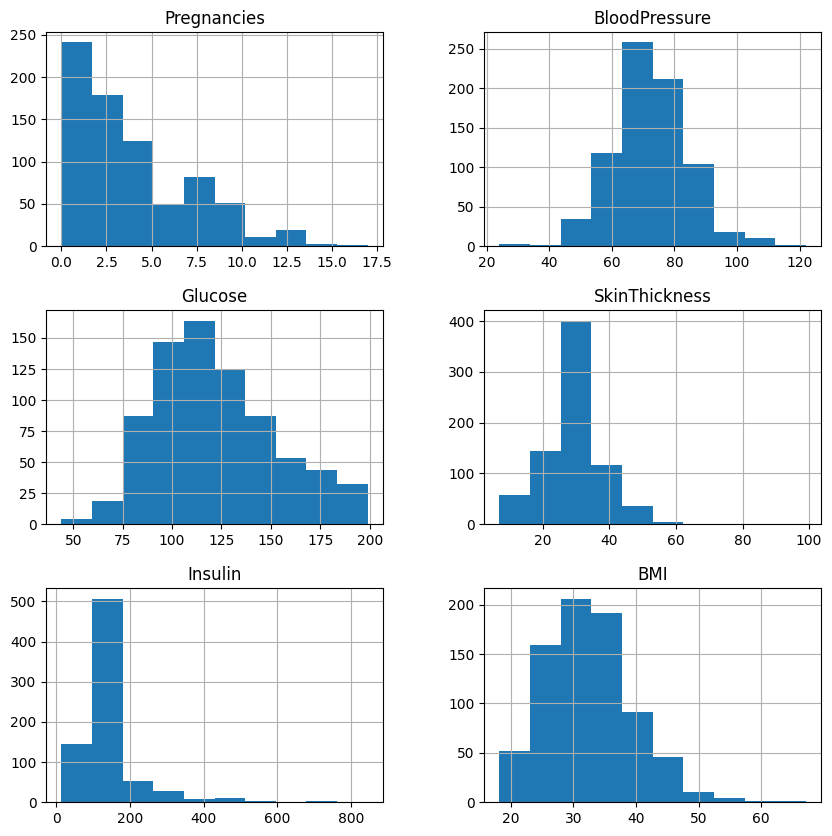

In [50]:
data[['Pregnancies', 'BloodPressure', 'Glucose', 'SkinThickness', 'Insulin', 'BMI']].hist(figsize=(10, 10))

In [52]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [53]:
sc = StandardScaler()

new_data = sc.fit_transform(data.drop(columns = ['Outcome']))
df = pd.DataFrame(new_data, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [54]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.637200,0.863067,-0.035158,0.673965,-0.174404,0.170111,0.480763,1.421694
1,-0.849339,-1.202632,-0.532156,-0.008520,-0.174404,-0.850018,-0.366726,-0.191322
2,1.231815,2.010678,-0.697822,-0.008520,-0.174404,-1.330936,0.618940,-0.106426
3,-0.849339,-1.071477,-0.532156,-0.691005,-0.530781,-0.631419,-0.931719,-1.040277
4,0.339892,-0.186177,0.130508,-0.691005,-0.174404,-0.995751,-0.827319,-0.276217
...,...,...,...,...,...,...,...,...
756,1.529123,1.584422,0.130508,0.218975,-0.174404,1.685731,-0.207055,0.827425
757,1.529123,-1.071477,-0.863487,-0.008520,-0.174404,-1.447522,-1.008485,-0.021531
758,1.826431,-0.678010,0.296174,2.152683,0.457877,0.068098,-0.919437,2.525336
759,0.339892,-0.022233,-0.035158,-0.691005,-0.323853,-0.908311,-0.692212,-0.276217


In [55]:
x_train, x_test, y_train, y_test = train_test_split(df, data['Outcome'])

print(x_train.shape, y_train.shape)

(570, 8) (570,)


In [60]:
class KNNmodel:

    def __init__(self):
        self.x_train = None
        self.y_train = None
    
    def fit(self, x_train, y_train):
        self.x_train = np.array(x_train)
        self.y_train = np.array(y_train)

    def eucledian(self, x, y):
        return np.sqrt(np.sum((x-y) ** 2))
    
    def predict(self, x_test, k):
        predicted_outcomes = []
        for test_data in x_test:
            distances = np.array([self.eucledian(train_data, test_data) for train_data in self.x_train])
            dist = np.argsort(distances)[:k]
            labels = self.y_train[dist]
            mode_label = mode(labels)
            mode_label = mode_label.mode[0]
            predicted_outcomes.append(mode_label)
        return predicted_outcomes

In [61]:
model = KNNmodel()


In [62]:
model.fit(x_train, y_train)

In [66]:
accuracy_scores = []
for k in range(1, 10):
    y_pred = model.predict(np.array(x_test), k)
    acc = accuracy_score(y_test, y_pred)
    print(f"k = {k}, accuracy = {acc}")
    accuracy_scores.append(acc)


C:\Users\Jeevika\AppData\Local\Temp\ipykernel_10580\1059043185.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


k = 1, accuracy = 0.680628272251309


C:\Users\Jeevika\AppData\Local\Temp\ipykernel_10580\1059043185.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


k = 2, accuracy = 0.7015706806282722


C:\Users\Jeevika\AppData\Local\Temp\ipykernel_10580\1059043185.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


k = 3, accuracy = 0.7382198952879581


C:\Users\Jeevika\AppData\Local\Temp\ipykernel_10580\1059043185.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


k = 4, accuracy = 0.7329842931937173


C:\Users\Jeevika\AppData\Local\Temp\ipykernel_10580\1059043185.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


k = 5, accuracy = 0.7643979057591623


C:\Users\Jeevika\AppData\Local\Temp\ipykernel_10580\1059043185.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


k = 6, accuracy = 0.7277486910994765


C:\Users\Jeevika\AppData\Local\Temp\ipykernel_10580\1059043185.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


k = 7, accuracy = 0.7329842931937173


C:\Users\Jeevika\AppData\Local\Temp\ipykernel_10580\1059043185.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


k = 8, accuracy = 0.7225130890052356


C:\Users\Jeevika\AppData\Local\Temp\ipykernel_10580\1059043185.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


k = 9, accuracy = 0.7382198952879581


<AxesSubplot: >

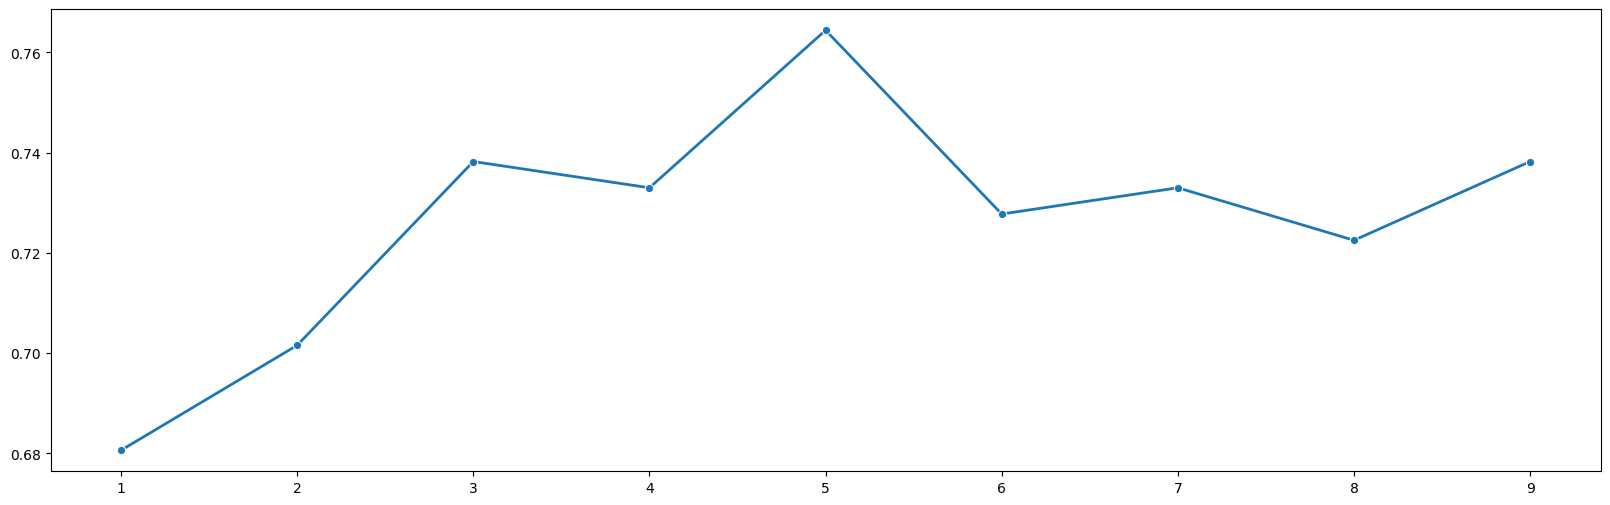

In [67]:
plt.figure(figsize=(20, 6))
sns.lineplot(x = range(1, 10), y=accuracy_scores, lw=2, marker = 'o')